In [1]:
import os

dataset_path = 'pills-dataset'

# Iterate over 'train' and 'valid' directories
for split in ['train', 'valid']:
    split_path = os.path.join(dataset_path, split)
    print(f"\n{split.capitalize()} Set:")

    # Ensure the split directory exists
    if not os.path.isdir(split_path):
        print(f"Directory '{split_path}' does not exist.")
        continue

    # List all class subdirectories within the split directory
    class_dirs = [d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))]
    print(f"Classes: {class_dirs}")

    # Count the number of images in each class subdirectory
    for cls in class_dirs:
        cls_path = os.path.join(split_path, cls)
        # List all files in the class directory
        files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
        print(f"{cls}: {len(files)} images")



Train Set:
Classes: ['Amoxicillin 500 MG', 'apixaban 2.5 MG', 'aprepitant 80 MG', 'Atomoxetine 25 MG', 'benzonatate 100 MG', 'Calcitriol 0.00025 MG', 'carvedilol 3.125 MG', 'celecoxib 200 MG', 'duloxetine 30 MG', 'eltrombopag 25 MG', 'montelukast 10 MG', 'mycophenolate mofetil 250 MG', 'Oseltamivir 45 MG', 'pantoprazole 40 MG', 'pitavastatin 1 MG', 'prasugrel 10 MG', 'Ramipril 5 MG', 'saxagliptin 5 MG', 'sitagliptin 50 MG', 'tadalafil 5 MG']
Amoxicillin 500 MG: 50 images
apixaban 2.5 MG: 52 images
aprepitant 80 MG: 62 images
Atomoxetine 25 MG: 56 images
benzonatate 100 MG: 53 images
Calcitriol 0.00025 MG: 50 images
carvedilol 3.125 MG: 52 images
celecoxib 200 MG: 46 images
duloxetine 30 MG: 50 images
eltrombopag 25 MG: 48 images
montelukast 10 MG: 48 images
mycophenolate mofetil 250 MG: 54 images
Oseltamivir 45 MG: 50 images
pantoprazole 40 MG: 46 images
pitavastatin 1 MG: 43 images
prasugrel 10 MG: 52 images
Ramipril 5 MG: 38 images
saxagliptin 5 MG: 44 images
sitagliptin 50 MG: 52 i

In [ ]:
%pip install tensorflow

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 128
BATCH_SIZE = 32

# Train data generator with augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Validation data generator (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    'pills-dataset/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Validation generator
val_generator = val_datagen.flow_from_directory(
    'pills-dataset/valid',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 994 images belonging to 20 classes.
Found 274 images belonging to 20 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),  # <-- Add this line
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,307,220 (12.62 MB)

 Trainable params: 3,307,220 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
%pip install Pillow

EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Note: you may need to restart the kernel to use updated packages.


c:\Users\asus\Downloads\Pill Identification Flask\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.1408 - loss: 2.8355 - val_accuracy: 0.5182 - val_loss: 1.5322
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 341ms/step - accuracy: 0.5331 - loss: 1.4836 - val_accuracy: 0.8832 - val_loss: 0.5403
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.7789 - loss: 0.6975 - val_accuracy: 0.9197 - val_loss: 0.3484
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - accuracy: 0.8479 - loss: 0.4743 - val_accuracy: 0.9635 - val_loss: 0.1191
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - accuracy: 0.9049 - loss: 0.3213 - val_accuracy: 0.9635 - val_loss: 0.1025
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.9301 - loss: 0.2302 - val_accuracy: 0.9635 - val_loss: 0.1200
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 277ms/step - accuracy: 0.9467 - loss: 0.1586 - val_accuracy: 0.9745 - val_loss: 0.0668
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - accuracy: 0.9609 - loss: 0.1243 - val_accuracy: 

In [ ]:
%pip install matplotlib

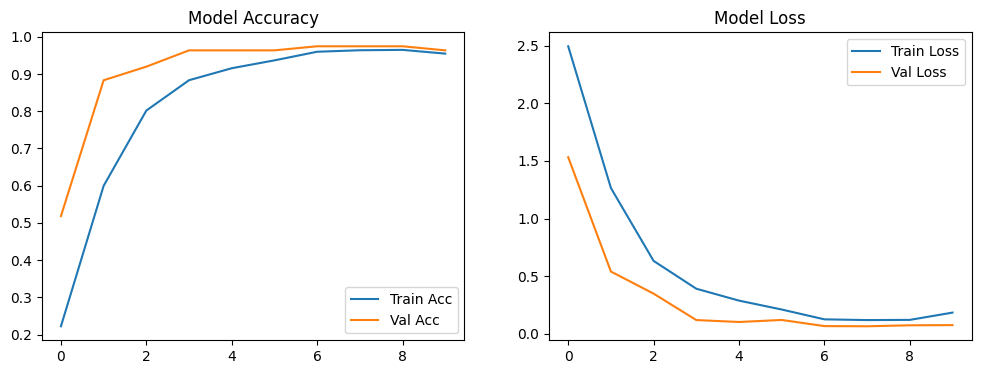

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Model Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [6]:
#model.save("pill_identifier_model.h5")
model.save("pill_identifier_model.keras")


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

class_labels = ['Amoxicillin 500 MG', 'apixaban 2.5 MG', 'aprepitant 80 MG', 'Atomoxetine 25 MG', 'benzonatate 100 MG', 'Calcitriol 0.00025 MG', 'carvedilol 3.125 MG', 'celecoxib 200 MG', 'duloxetine 30 MG', 'eltrombopag 25 MG', 'montelukast 10 MG', 'mycophenolate mofetil 250 MG', 'Oseltamivir 45 MG', 'pantoprazole 40 MG', 'pitavastatin 1 MG', 'prasugrel 10 MG', 'Ramipril 5 MG', 'saxagliptin 5 MG', 'sitagliptin 50 MG', 'tadalafil 5 MG']
def predict_pill(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    
    class_labels = list(train_generator.class_indices.keys())
    return class_labels[class_idx], prediction[0][class_idx]



In [13]:
print(list(train_generator.class_indices.keys()))

['Amoxicillin 500 MG', 'Atomoxetine 25 MG', 'Calcitriol 0.00025 MG', 'Oseltamivir 45 MG', 'Ramipril 5 MG', 'apixaban 2.5 MG', 'aprepitant 80 MG', 'benzonatate 100 MG', 'carvedilol 3.125 MG', 'celecoxib 200 MG', 'duloxetine 30 MG', 'eltrombopag 25 MG', 'montelukast 10 MG', 'mycophenolate mofetil 250 MG', 'pantoprazole 40 MG', 'pitavastatin 1 MG', 'prasugrel 10 MG', 'saxagliptin 5 MG', 'sitagliptin 50 MG', 'tadalafil 5 MG']


In [12]:
# Example usage for testing model prediction on an input image
test_img_path = r"C:\Users\asus\Downloads\Pill Identification Flask\pill-identifier-app\static\uploads\pitavastatin 1 MG (1).jpg"  # Replace with your image path

pred_class, confidence = predict_pill(test_img_path)
print(f"Predicted class: {pred_class}")
print(f"Confidence: {confidence:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted class: pitavastatin 1 MG
Confidence: 0.9999
